<a href="https://colab.research.google.com/github/EstebanAG1005/Proyecto-Data-Science/blob/main/An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga y Revisión Inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import pandas as pd
import zipfile

# Mount the Google Drive
drive.mount('/content/drive')

# Path to the zip file
path_imgs = "/content/drive/MyDrive/Proyecto-Data-Science/dfl-bundesliga-data-shootout.zip"

# Extract the zip file
with zipfile.ZipFile(path_imgs, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Assuming the train.csv is directly inside the zip, read the CSV file
df = pd.read_csv('/content/train.csv')

# Visualizar las primeras y últimas filas
print('Primeras Filas')
print(df.head())
print('\n\n\nUltimas Filas')
print(df.tail())


Mounted at /content/drive
     video_id        time      event           event_attributes
0  1606b0e6_0  200.265822      start                        NaN
1  1606b0e6_0  201.150000  challenge     ['ball_action_forced']
2  1606b0e6_0  202.765822        end                        NaN
3  1606b0e6_0  210.124111      start                        NaN
4  1606b0e6_0  210.870000  challenge  ['opponent_dispossessed']
Primeras Filas
     video_id        time      event           event_attributes
0  1606b0e6_0  200.265822      start                        NaN
1  1606b0e6_0  201.150000  challenge     ['ball_action_forced']
2  1606b0e6_0  202.765822        end                        NaN
3  1606b0e6_0  210.124111      start                        NaN
4  1606b0e6_0  210.870000  challenge  ['opponent_dispossessed']



Ultimas Filas
         video_id         time      event           event_attributes
11213  ecf251d4_0  3056.587000  challenge  ['opponent_dispossessed']
11214  ecf251d4_0  3058.072895      

# 2.Valores Faltantes

In [2]:
df.event.value_counts()

play         3586
start        3418
end          3418
challenge     624
throwin       172
Name: event, dtype: int64

In [3]:
# Valores faltantes
print(df.isnull().sum())

video_id               0
time                   0
event                  0
event_attributes    6836
dtype: int64


In [6]:
df.event_attributes.value_counts()

['pass', 'openplay']                  3337
['ball_action_forced']                 239
['pass']                               154
['opponent_dispossessed']              138
['pass', 'freekick']                   127
['fouled']                             111
['cross', 'openplay']                   80
['challenge_during_ball_transfer']      53
['possession_retained']                 44
['opponent_rounded']                    39
['cross', 'corner']                     33
['cross']                               18
['cross', 'freekick']                    5
['pass', 'corner']                       4
Name: event_attributes, dtype: int64

In [7]:
df.event_attributes.nunique()

14

# 3. Distribución de los Eventos y Atributos

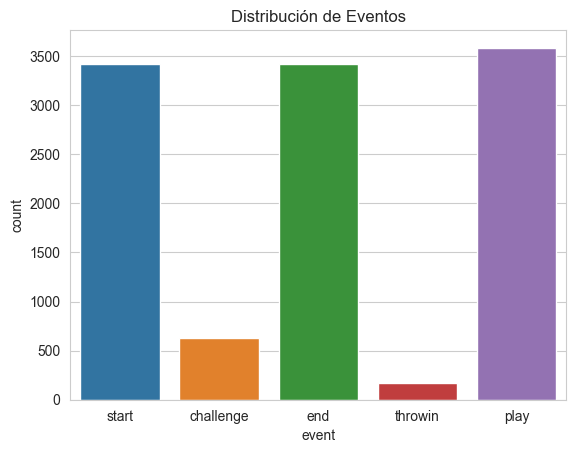

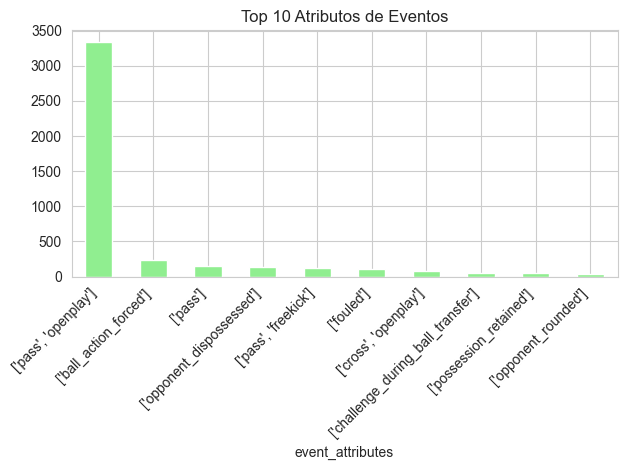

In [ ]:
# Distribución de eventos
sns.countplot(data=df, x='event')
plt.title('Distribución de Eventos')
plt.show()

# Distribución de atributos (10 más comunes, debido a la variedad)
top_attributes = df['event_attributes'].value_counts().head(10)
top_attributes.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Atributos de Eventos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 4. Distribución del Tiempo

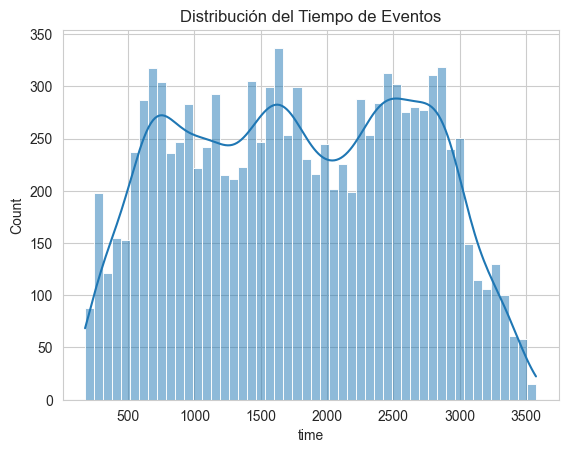

In [ ]:
# Histograma del tiempo
sns.histplot(df['time'], kde=True, bins=50)
plt.title('Distribución del Tiempo de Eventos')
plt.show()


# 5. Relaciones entre las Variables

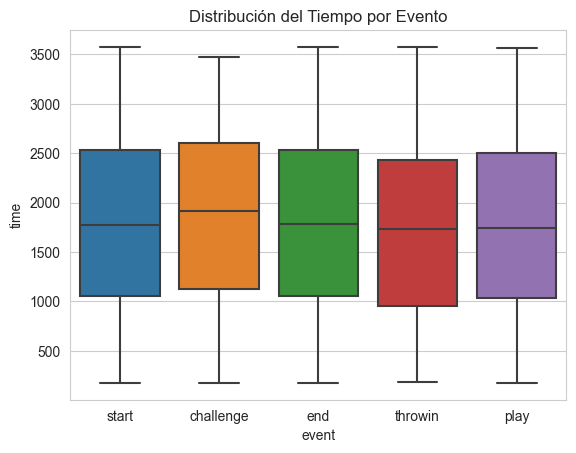

In [ ]:
# Boxplot del tiempo agrupado por eventos
sns.boxplot(data=df, x='event', y='time')
plt.title('Distribución del Tiempo por Evento')
plt.show()


# 6. Patrones en Atributos según Eventos#

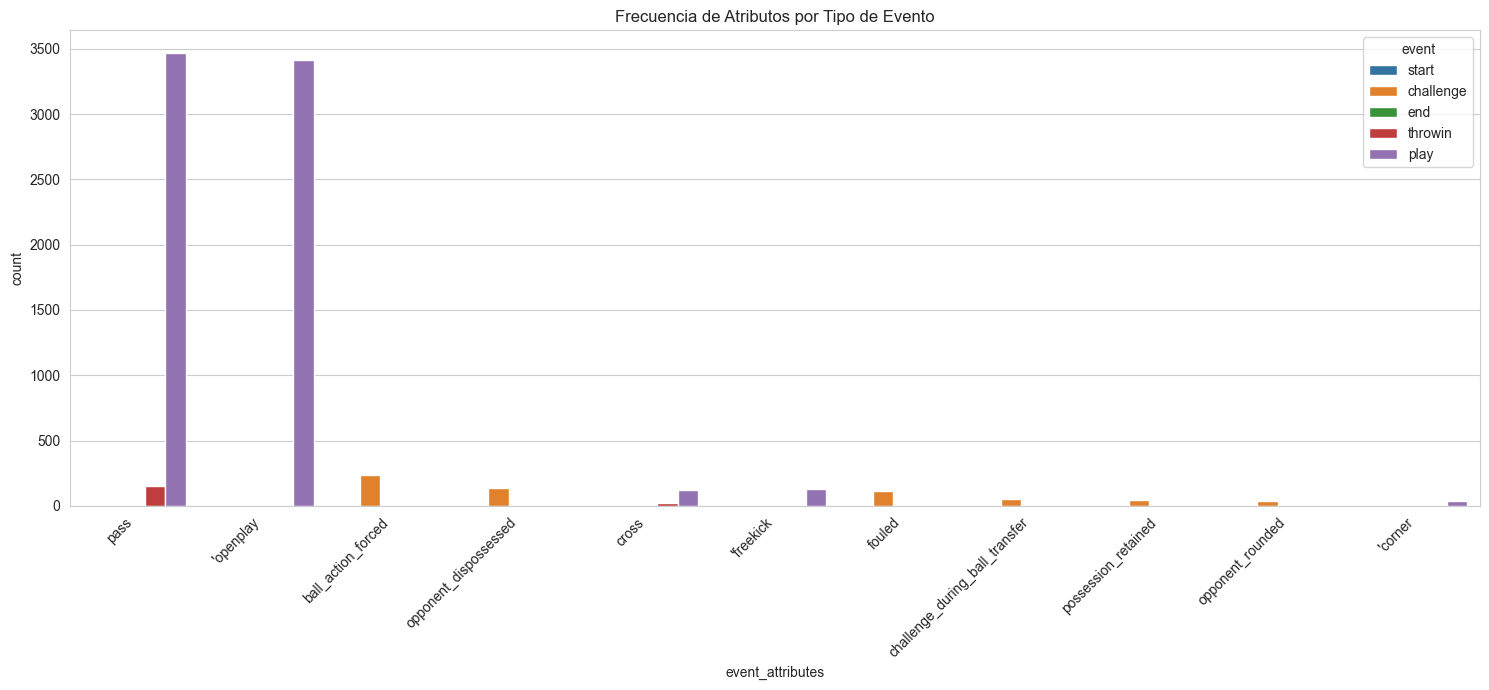

In [ ]:
# Limpiar la columna 'event_attributes'
df['event_attributes'] = df['event_attributes'].str.replace("[", "").str.replace("]", "").str.strip()

# Convertir 'event_attributes' en una lista y expandirla
df_expanded = df.assign(event_attributes=df['event_attributes'].str.split(',')).explode('event_attributes')

# Limpiar espacios adicionales que pueden haber quedado alrededor de los atributos después de dividir
df_expanded['event_attributes'] = df_expanded['event_attributes'].str.strip("'").str.strip()

# Visualizar la frecuencia de atributos por tipo de evento
plt.figure(figsize=(15, 7))
sns.countplot(data=df_expanded, x='event_attributes', hue='event', order=df_expanded['event_attributes'].value_counts().index)
plt.title('Frecuencia de Atributos por Tipo de Evento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 7. Análisis de Secuencias

next_event
play         2757
challenge     490
throwin       171
Name: count, dtype: int64


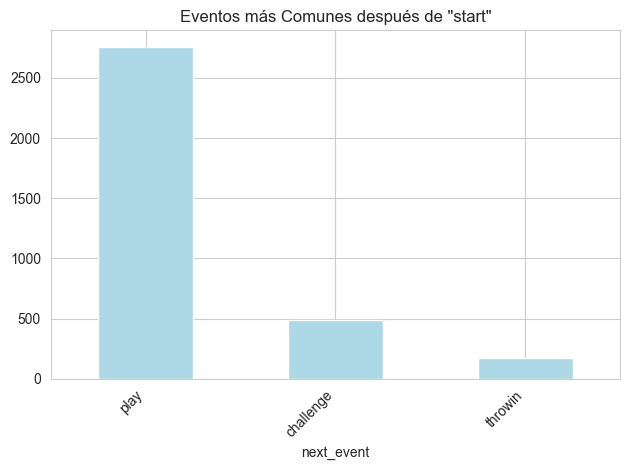

In [ ]:
# Generar secuencias de eventos y contarlas
df['next_event'] = df['event'].shift(-1)
sequences = df[df['event'] == 'start']['next_event'].value_counts()
print(sequences)

# Visualización
sequences.plot(kind='bar', color='lightblue')
plt.title('Eventos más Comunes después de "start"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
df['time_end'] = df.time.shift(-1)

In [9]:
df['time_start'] = df.time.shift(1)

In [10]:
df = df.dropna(subset=['event_attributes'])

In [11]:
df = df.reset_index().drop(columns=['index'])

In [12]:
# Visualizar las primeras y últimas filas
print('Primeras Filas')
print(df.head())
print('\n\n\nUltimas Filas')
print(df.tail())

Primeras Filas
     video_id    time      event           event_attributes    time_end  \
0  1606b0e6_0  201.15  challenge     ['ball_action_forced']  202.765822   
1  1606b0e6_0  210.87  challenge  ['opponent_dispossessed']  212.624111   
2  1606b0e6_0  219.23    throwin                   ['pass']  220.350213   
3  1606b0e6_0  224.43       play       ['pass', 'openplay']  226.430850   
4  1606b0e6_0  229.39       play       ['pass', 'openplay']  231.455367   

   time_start  
0  200.265822  
1  210.124111  
2  217.850213  
3  223.930850  
4  228.955367  



Ultimas Filas
        video_id      time      event           event_attributes     time_end  \
4377  ecf251d4_0  3041.347       play       ['pass', 'openplay']  3043.126523   
4378  ecf251d4_0  3050.347       play       ['pass', 'openplay']  3053.067000   
4379  ecf251d4_0  3053.067       play       ['pass', 'openplay']  3053.744023   
4380  ecf251d4_0  3056.587  challenge  ['opponent_dispossessed']  3058.072895   
4381  ecf251d4_0

In [14]:
df.shape

(4382, 6)

# 8. Split the los juegos completos en videos pequeños que despues de eso serán convertidos en frames

In [15]:
!pip install moviepy

In [21]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import shutil
import os

for index, row in df.iterrows():
    video_name = row['event'] + "_" + row['video_id'] + "_" + str(row['time_start']) + "_" + str(row['time_end']) + ".mp4"
    ffmpeg_extract_subclip("train/" + row['video_id'] + ".mp4", row['time_start'], row['time_end'], targetname= video_name)
    shutil.move(os.path.abspath(video_name), "train/" + row['event'])

Streaming output truncated to the last 5000 lines.
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Mo